## Practica COVID

Realizar la planificación y modelado de una simulacion basado en eventos discretos para identificar los contagios dentro de un establecimiento de estudiantes post COVID-19 para el reingreso de clases. Los pasos para el regreso progresivo a clases se describe a continuación:
* Calcular e Identificar el aforo máximo permitido en la institución educativa.
* Identificar el número de estudiantes y el porcentaje de contagio dentro del contexto poblacional el mismo que se aplicara dentro de la simulación por el contagio.
* Generar la simulación desde la puerta de ingreso y la salida del plantel por día.
* Los estudiantes hacen fila para ingresar al establecimiento y no pueden superar el aforo permitido.
* Realizar con un tiempo de un 1 mes.
         
Generar graficas que indiquen los estudiantes que presentaron complicaciones y el total de estudiantes por establecimiento en cada día o semana.

**Nota**: No tomar datos de transporte, numero de aulas, personal docente, etc. Solo se el ingreso, salida y el contagio dentro del establecimiento.

In [22]:
## se importan las librerias 

import simpy
import random
import matplotlib.pyplot as plt
from scipy import stats 

In [23]:
PORCENTAJE_CONTAGIO = 0.05
AFORO = 300 
TIEMPO_SIMULACION = 360*38
DIAS = 1

estadia = 0
total_contagiados = {} ##por dia

In [24]:
class Establecimiento(object):    
    def __init__(self, environment, AFORO):
        self.env = environment
        self.aforo = simpy.Resource(environment, AFORO)

    def duracion_clases(self):
        yield self.env.timeout(360) #6 horas

def llegada_estudiantes(env, establecimiento, contagio, dia):
    with establecimiento.aforo.request() as estudiante:

        contagiados = 0
        yield estudiante
        yield env.process(establecimiento.duracion_clases())

        if estadia<=0 and estadia<60:
            bernoulli = stats.bernoulli(contagio)
            contagiados = bernoulli.rvs(1)

        elif estadia<=60 and estadia<120:
            contagio =+ 0.1
            bernoulli = stats.bernoulli(contagio)
            contagiados = bernoulli.rvs(1)

        elif estadia>=120 and estadia<180:
            contagio =+ 0.2
            bernoulli = stats.bernoulli(contagio)
            contagiados = bernoulli.rvs(1)

        elif estadia>=180 and estadia<240:
            contagio =+ 0.3
            bernoulli = stats.bernoulli(contagio)
            contagiados = bernoulli.rvs(1)

        elif estadia>=240 and estadia<300:
            contagio =+ 0.4
            bernoulli = stats.bernoulli(contagio)
            contagiados = bernoulli.rvs(1)

        elif estadia>=300 and estadia<360:
            contagio =+ 0.5
            bernoulli = stats.bernoulli(contagio)
            contagiados = bernoulli.rvs(1)

        if contagiados == 1 :
            if dia in total_contagiados.keys():
                total_contagiados[dia]+=1
            else:
                total_contagiados[dia]=1

def ejecutar_simulacion(env, aforo):
    establecimiento = Establecimiento(env, aforo)
    global total_contagiados
    global DIAS
    global estadia
    
    while True:
        estadia += 1
        yield env.timeout(1)
        env.process(llegada_estudiantes(env, establecimiento, PORCENTAJE_CONTAGIO, DIAS))
        
        if estadia == 360:
            DIAS += 1
            estadia = 0
        # contagios.append(contador)
        
print('Inicio de clases')

env = simpy.Environment()
env.process(ejecutar_simulacion(env, AFORO))
env.run(until = TIEMPO_SIMULACION)

Inicio de clases


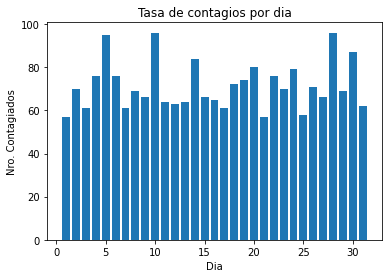

In [25]:
etiqueta =  list(total_contagiados.keys())
valores = list(total_contagiados.values())

plt.bar(etiqueta, valores, align="center")
plt.title("Nro. de contagios por dia")
plt.xlabel("Dia")
plt.ylabel("Nro. Contagiados")
plt.show()